<a id=0></a>
# 10.Classification models
※　分類の機械学習モデル

---
### [1. 探索的データ分析（EDA）、スケーリング](#1)
### [2. Random Forest Classifier](#2)
### [3. KNeighbors Classifier](#3)
### [4. SVC](#4)
### [5. Logistic Regression](#5)
### [6. モデルの評価](#6)
---

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA)、スケーリング

* 乳がんデータセット
* 相関関係
* 分布、外れ値などの確認
* スケーリング
---

乳がんデータセット

相関関係

分布、外れ値などの確認

スケーリング

---
<a id=2></a>
[Topへ](#0)

---
## 2. RandomForestClassifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* 予想された確率
* confusion matrix（混同行列）
* precision（適合率）、 recall（再現率）、f1_score（F1値）
---

n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=None, max_samples=None

モデルのインポート

モデルインスタンスの作成

モデルの構築・属性・予測・スコア

予想された確率

confusion matrix（混同行列）

precision（適合率）、 recall（再現率）、f1_score（F1値）

---
<a id=3></a>
[Topへ](#0)

---
## 3. KNeighbors Classifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

n_neighbors=5, weights='uniform'

モデルのインポート

モデルインスタンスの作成

モデルの構築・予測・スコア

confusion matrix（混同行列）

---
<a id=4></a>
[Topへ](#0)

---
## 4. SVC

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, gamma='scale', random_state=None

モデルのインポート

モデルインスタンスの作成

モデルの構築・予測・スコア

confusion matrix（混同行列）

---
<a id=5></a>
[Topへ](#0)

---
## 5. Logistic Regression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, random_state=None, max_iter=100

モデルのインポート

モデルインスタンスの作成

モデルの構築・予測・スコア

confusion matrix（混同行列）

---
<a id=6></a>
[Topへ](#0)

---
## 6. モデルの評価

* precision_recall_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html  
* f1_score, precision, recall
* roc_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.htm  
---

precision_recall_curve

f1_score, precision, recall

roc_curve

In [410]:
np.random.seed(17)
pos = np.random.randn(1000) + 1.5
neg = np.random.randn(1000) - 1.5
neg2 = np.random.randn(1000) - 7
neg3 = np.random.randn(900) + 1.5

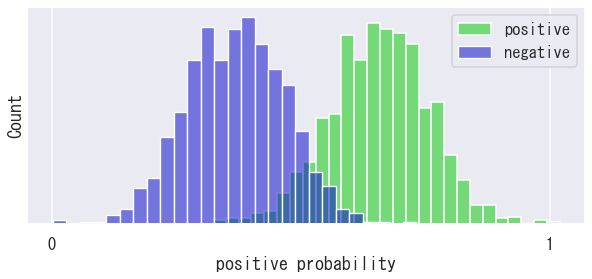

In [411]:
# あるモデルによりポジティブである確率を求めた
# 中央付近では確率が高くても実際にはネガティブ、低くてもポジティブなものが混在する
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-5.2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を中央付近にあると、バーの重なる部分が FP, FN になる

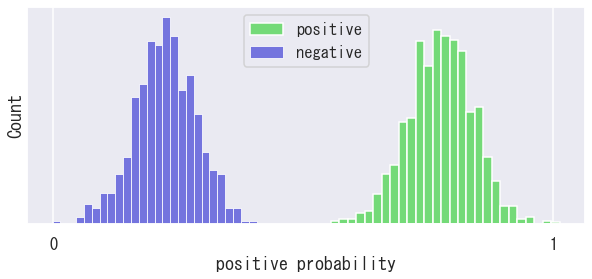

In [412]:
# このモデルでは100％の精度で分離することができている
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg2, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-10.5, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# ある閾値でははっきりと0：1に分かれる

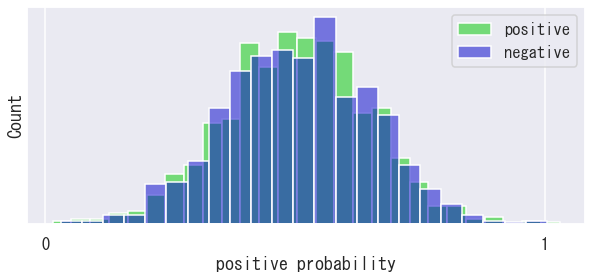

In [413]:
## ランダム（無作為）な確率をそれぞれに与える場合、どの確率においてもポジティブ、ネガティブの割合は一定
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg3, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を下げていくとTPRが上がり、同じ割合でFPRも上がっていく
# 結果として直線になると考えることができる

In [377]:
def calcurate_metrics(np, nn, tp, tn):
    fp = np - tp
    fn = nn - tn
    fpr = fp / (tn + fp)
    tpr = tp / (tp + fn)
    pre = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = 2 * pre * rec / (pre + rec)
    print(f'FPR : {fpr},  TPR : {tpr}')
    print(f'PRE : {pre},  REC : {rec}')

In [176]:
calcurate_metrics(1000, 1000, 900, 600)

FPR : 0.14285714285714285,  TPR : 0.6923076923076923
PRE : 0.9,  REC : 0.6923076923076923


In [183]:
calcurate_metrics(100, 10000, 80, 9990)

FPR : 0.001998001998001998,  TPR : 0.8888888888888888
PRE : 0.8,  REC : 0.8888888888888888


In [165]:
# fpr = fp / (tn + fp)
# tpr = tp / (tp + fn)
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
fpr, tpr, thresholds

(array([0.      , 0.      , 0.      , 0.015625, 0.03125 , 0.03125 ,
        0.03125 , 0.03125 , 0.03125 , 0.03125 , 0.03125 , 0.046875,
        0.046875, 0.0625  , 0.0625  , 0.078125, 0.09375 , 0.125   ,
        0.140625, 0.140625, 0.140625, 0.171875, 0.21875 , 0.265625,
        0.28125 , 0.3125  , 0.359375, 0.53125 , 1.      ]),
 array([0.        , 0.47663551, 0.70093458, 0.74766355, 0.80373832,
        0.81308411, 0.8317757 , 0.87850467, 0.91588785, 0.92523364,
        0.94392523, 0.94392523, 0.95327103, 0.95327103, 0.96261682,
        0.96261682, 0.97196262, 0.97196262, 0.97196262, 0.99065421,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([2.  , 1.  , 0.98, 0.97, 0.96, 0.95, 0.94, 0.83, 0.81, 0.72, 0.69,
        0.68, 0.63, 0.52, 0.47, 0.42, 0.37, 0.35, 0.29, 0.27, 0.26, 0.25,
        0.11, 0.1 , 0.06, 0.05, 0.02, 0.01, 0.  ]))

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---